Capítulo 10: Introdução às Redes Neurais Artificiais

O Capítulo 10, "Introdução às Redes Neurais Artificiais", aborda os **conceitos fundamentais das Redes Neurais Artificiais (RNAs)**, incluindo sua arquitetura e métodos de treinamento. Ele transita desde as inspirações biológicas até as implementações práticas usando TensorFlow.

## De Neurônios Biológicos a Artificiais

*   **Origem e Inspiração**: As RNAs foram introduzidas em 1943 por Warren McCulloch e Walter Pitts, baseando-se em um **modelo computacional simplificado de neurônios biológicos** para realizar cálculos usando lógica proposicional.
*   **Neurônio Biológico**: Consiste em um corpo celular, **dendritos** (que recebem sinais) e um **axônio** longo com terminais sinápticos (sinapses) que se conectam a outros neurônios. Ele dispara sinais elétricos quando recebe impulsos suficientes.
*   **Neurônios Artificiais (LTUs)**: As RNAs são inspiradas em neurônios biológicos, mas não precisam ser biologicamente realistas para serem eficazes. O capítulo menciona que neurônios são frequentemente organizados em camadas consecutivas.

## Perceptrons

*   **Primeira Arquitetura de RNA**: Os Perceptrons foram as primeiras arquiteturas de RNA. São baseados em **Unidades de Limiar Linear (LTUs)**.
*   **Funcionamento do LTU**: Um LTU calcula uma **soma ponderada das entradas** e aplica uma **função de passo** (como a função de passo Heaviside ou a função `sgn`) para produzir uma saída binária (0 ou 1, ou -1 e 1).
*   **Composição do Perceptron**: Um Perceptron é formado por uma única camada de LTUs, onde cada neurônio está conectado a todas as entradas. Geralmente, uma **entrada de polarização (bias)** (`x0 = 1`) é adicionada.
*   **Algoritmo de Treinamento**: O algoritmo de treinamento do Perceptron, proposto por Frank Rosenblatt, foi inspirado na regra de Hebb e garante a convergência para uma solução se os dados forem **linearmente separáveis**.
*   **Limitações**: Perceptrons são **incapazes de aprender padrões complexos** que não são linearmente separáveis (ex: problema XOR), o que levou a um declínio na pesquisa em redes neurais na década de 1960. Um Perceptron não produz probabilidades de classe, apenas previsões baseadas em um limiar rígido, ao contrário da Regressão Logística.

## Perceptrons Multi-Camadas (MLPs) e Retropropagação

*   **Arquitetura do MLP**: Um MLP é composto por uma camada de entrada (passthrough), **uma ou mais camadas ocultas** de LTUs e uma camada de saída final. Cada camada (exceto a de saída) inclui um neurônio de polarização e é totalmente conectada à camada seguinte.
*   **Rede Neural Profunda (DNN)**: Uma RNA com duas ou mais camadas ocultas é chamada de **Deep Neural Network (DNN)**.
*   **Algoritmo de Treinamento (Retropropagação)**: O algoritmo de **retropropagação (backpropagation)** é crucial para treinar MLPs.
    *   **Passo para frente**: Calcula a saída de cada neurônio camada por camada.
    *   **Cálculo do Erro**: Mede o erro da rede na camada de saída.
    *   **Passo reverso**: Propaga o gradiente do erro para trás, pelas camadas, calculando a contribuição de cada conexão para o erro.
    *   **Ajuste de Pesos**: Ajusta os pesos das conexões usando o Gradiente Descendente para reduzir o erro.
    *   **Relação com Autodiferenciação**: A retropropagação é uma forma de **autodiferenciação no modo reverso**.
*   **Funções de Ativação em MLPs**: Para que a retropropagação funcione, as funções de passo rígidas foram substituídas por **funções de ativação contínuas e diferenciáveis**, como a função logística (sigmoide).

## Funções de Ativação

As funções de ativação introduzem **não-linearidades** nas redes neurais, permitindo que elas aprendam padrões complexos.

*   **Função Logística (Sigmoide)**: Possui formato em "S", com saída entre 0 e 1. É contínua e diferenciável, essencial para o Gradiente Descendente.
*   **Função Tangente Hiperbólica (tanh)**: Também em "S", com saída entre -1 e 1. Tende a normalizar as saídas da camada em torno de zero, o que pode acelerar a convergência.
*   **Função ReLU (Rectified Linear Unit)**: Definida como `max(0, z)`. É rápida de calcular e não satura para valores de entrada grandes, o que ajuda a mitigar problemas de Gradiente Descendente. Embora não seja biologicamente realista, a ReLU geralmente apresenta melhor desempenho em RNAs.
*   **Função Softmax**: Usada comumente na camada de saída para **problemas de classificação multiclasse** (com classes mutuamente exclusivas), fornecendo probabilidades estimadas para cada classe.
*   **Redes Feedforward (FNN)**: Redes neurais onde o sinal flui apenas em uma direção (entrada para saída).

## Treinando um MLP com TensorFlow

O TensorFlow permite construir e treinar RNAs usando uma **API de alto nível (TF.Learn)** para simplicidade ou uma **API de baixo nível** para maior controle.

*   **Fases do Programa TensorFlow**:
    1.  **Fase de Construção**: Define o grafo de computação do modelo, incluindo as camadas neurais e as operações de treinamento.
    2.  **Fase de Execução**: Roda o grafo em uma sessão, inicializando variáveis e avaliando as operações para treinar o modelo.
*   **Nós Importantes**:
    *   **`tf.Variable`**: Representa os parâmetros do modelo (pesos e vieses).
    *   **`tf.placeholder`**: Usado para alimentar dados de entrada (X) e rótulos (y) para a rede durante a execução.
    *   **`tf.name_scope`**: Ajuda a organizar nós relacionados no grafo, tornando a visualização no TensorBoard mais clara.
*   **Camadas Conectadas**: O TensorFlow oferece a função `fully_connected()` (em `tf.contrib.layers`) para criar camadas totalmente conectadas, gerenciando pesos, vieses e funções de ativação.
*   **`logits`**: São as saídas da rede neural **antes** de passar pela função de ativação softmax; são frequentemente manipulados separadamente para otimização.
*   **Função de Custo**: Para classificação multiclasse, a **entropia cruzada** é uma escolha comum, implementada com `tf.nn.sparse_softmax_cross_entropy_with_logits()`. A média do erro é calculada com `tf.reduce_mean()`.
*   **Otimizador**: Um otimizador (ex: `tf.train.GradientDescentOptimizer`) ajusta os parâmetros do modelo para minimizar a função de custo.
*   **Medida de Desempenho (Acurácia)**: Pode ser calculada usando `tf.nn.in_top_k()` (para verificar se a classe correta está entre as `k` maiores previsões) e `tf.reduce_mean()`.
*   **Salvando e Restaurando Modelos**: Modelos treinados podem ser **salvos e restaurados** usando `tf.train.Saver()` para reutilização ou para continuar o treinamento de um checkpoint.

## Ajuste Fino de Hiperparâmetros de Redes Neurais

O ajuste de hiperparâmetros é crucial para o desempenho do modelo.

*   **Estratégia de Busca**: Devido ao grande espaço de hiperparâmetros, a **busca aleatória (`RandomizedSearchCV`)** é geralmente preferível à busca em grade (`GridSearchCV`).
*   **Número de Camadas Ocultas**: Para muitos problemas, uma ou duas camadas ocultas são suficientes. Redes profundas são mais eficientes em parâmetros e modelam dados hierárquicos, mas podem levar ao overfitting se forem excessivamente complexas.
*   **Número de Neurônios por Camada Oculta**: As camadas de entrada e saída são determinadas pela tarefa. As camadas ocultas podem ter um formato de funil (menos neurônios em camadas mais profundas) ou o mesmo número de neurônios. A estratégia "calças elásticas" (stretch pants) sugere usar mais neurônios e camadas do que o necessário, confiando no **early stopping** e outras técnicas de regularização para evitar overfitting.
*   **Funções de Ativação**: A função **ReLU** (ou suas variantes) é uma boa escolha para camadas ocultas. A **softmax** é recomendada para a camada de saída em tarefas de classificação multiclasse. Para tarefas de regressão, geralmente nenhuma função de ativação é usada na camada de saída.

---

### Implementação:

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, callbacks


Treinando um MLP com API de alto nível do TF

In [9]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    layers.Dense(300, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40, batch_size=50, validation_split=0.2)

Epoch 1/40


c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.5312 - loss: 0.6501 - val_accuracy: 0.7917 - val_loss: 0.4647
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.5312 - loss: 0.6501 - val_accuracy: 0.7917 - val_loss: 0.4647
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6354 - loss: 0.5219 - val_accuracy: 0.7917 - val_loss: 0.3616
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6354 - loss: 0.5219 - val_accuracy: 0.7917 - val_loss: 0.3616
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6354 - loss: 0.4716 - val_accuracy: 0.7917 - val_loss: 0.3142
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6354 - loss: 0.4716 - val_accuracy: 0.7917 - val_loss: 0.3142
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6354 - loss: 0.4512 - val_accuracy: 0.7917 - val_loss: 0.2934
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6354 - loss: 0.4512 - val_accuracy: 0.7917 - val_loss: 0.2934
Epoch 5/4

In [10]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [11]:
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

accuracy_score(y_test, y_pred_classes)

1.0

Treinando um DNN utilizando um Tensorflow regular

In [12]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [13]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.keras.Input(shape=(n_inputs,), name="X", dtype=tf.float32)
y = tf.keras.Input(shape=(), name="y", dtype=tf.int64)

In [14]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.shape[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.random.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        Z = tf.matmul(X, W) + b
        if activation == "relu":
            return tf.nn.relu(Z)
        else:
            return Z

In [15]:
with tf.name_scope("dnn"):
    hidden1 = layers.Dense(n_hidden1, activation="relu", name="hidden1")(X)
    hidden2 = layers.Dense(n_hidden2, activation="relu", name="hidden2")(hidden1)
    logits = layers.Dense(n_outputs, name="outputs")(hidden2)


In [16]:
with tf.name_scope("loss"):
    loss_layer = tf.keras.layers.Lambda(lambda inputs: tf.reduce_mean(
        tf.keras.losses.sparse_categorical_crossentropy(inputs[0], inputs[1], from_logits=True)), name="loss_layer")
    loss = loss_layer([y, logits])

In [17]:
learning_rate = 0.01

trainable_vars = []
for var in tf.compat.v1.global_variables():
    if 'weights' in var.name or 'biases' in var.name:
        trainable_vars.append(var)

with tf.name_scope("train"):
    optimizer = tf.keras.optimizers.SGD(learning_rate)

    @tf.function
    def training_op():
        with tf.GradientTape() as tape:
            current_loss = loss
        gradients = tape.gradient(current_loss, trainable_vars)
        optimizer.apply_gradients(zip(gradients, trainable_vars))

In [18]:
with tf.name_scope("eval"):
    correct = tf.keras.layers.Lambda(
        lambda inputs: tf.cast(
            tf.nn.in_top_k(predictions=inputs[0], targets=inputs[1], k=1), tf.float32),
        output_shape=(None,)
    )([logits, y])
    accuracy = tf.keras.layers.Lambda(
        lambda x: tf.reduce_mean(x),
        output_shape=()
    )(correct)

In [19]:
init = tf.compat.v1.global_variables_initializer()

checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)

Fase execução

In [20]:
mnist = tf.keras.datasets.mnist

In [21]:
n_epochs = 40
batch_size = 50

In [24]:
# Definir o modelo Keras para MNIST (caso não esteja definido acima)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento manual em batches no estilo TF2.x para MNIST
n_epochs = 40
batch_size = 50
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0
n_batches = len(x_train) // batch_size

for epoch in range(n_epochs):
    # Embaralhar os dados a cada época
    indices = np.random.permutation(len(x_train))
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train[indices]
    
    # Treinar em batches
    for iteration in range(n_batches):
        start = iteration * batch_size
        end = start + batch_size
        X_batch = x_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]
        
        # Treinar o modelo
        model.train_on_batch(X_batch, y_batch)
    
    # Avaliar no final da época
    train_loss, acc_train = model.evaluate(X_batch, y_batch, verbose=0)
    test_loss, acc_test = model.evaluate(x_test, y_test, verbose=0)
    
    print(f"Epoch {epoch}: Train accuracy: {acc_train:.4f}, Test accuracy: {acc_test:.4f}")

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 0: Train accuracy: 0.9800, Test accuracy: 0.9619
Epoch 1: Train accuracy: 1.0000, Test accuracy: 0.9741
Epoch 1: Train accuracy: 1.0000, Test accuracy: 0.9741
Epoch 2: Train accuracy: 1.0000, Test accuracy: 0.9742
Epoch 2: Train accuracy: 1.0000, Test accuracy: 0.9742
Epoch 3: Train accuracy: 1.0000, Test accuracy: 0.9783
Epoch 3: Train accuracy: 1.0000, Test accuracy: 0.9783
Epoch 4: Train accuracy: 0.9800, Test accuracy: 0.9767
Epoch 4: Train accuracy: 0.9800, Test accuracy: 0.9767
Epoch 5: Train accuracy: 1.0000, Test accuracy: 0.9790
Epoch 5: Train accuracy: 1.0000, Test accuracy: 0.9790
Epoch 6: Train accuracy: 1.0000, Test accuracy: 0.9800
Epoch 6: Train accuracy: 1.0000, Test accuracy: 0.9800
Epoch 7: Train accuracy: 1.0000, Test accuracy: 0.9785
Epoch 7: Train accuracy: 1.0000, Test accuracy: 0.9785
Epoch 8: Train accuracy: 1.0000, Test accuracy: 0.9814
Epoch 8: Train accuracy: 1.0000, Test accuracy: 0.9814
Epoch 9: Train accuracy: 0.9800, Test accuracy: 0.9778
Epoch 9: T

### Exercícios

1. Desenhe uma RNA com a utilização dos neurônios artificias originais (como os da figura 10-3) que calcule A XOR B.

2. Por que geralmente é preferível utilizar um classificador de Regressão Logística em vez de um Perceptron clássico (ou seja, uma única camada de unidades lineares com threshold treinadas com a atualização do algoritmo de treinamento Perceptron)? Como você pode ajustar um Perceptron para torná-lo equivalente a um classificador de Regressão Logística?

A Regressão Logística é geralmente preferida em relação ao Perceptron clássico porque:

- **Probabilidades:** A Regressão Logística estima probabilidades de classe (valores contínuos entre 0 e 1), enquanto o Perceptron só fornece uma decisão binária (0 ou 1) baseada em um limiar rígido.
- **Função de Custo Suave:** A Regressão Logística utiliza a função de custo log-loss (entropia cruzada), que é contínua e diferenciável, facilitando a otimização com métodos de gradiente. O Perceptron usa uma função de custo baseada em erro de classificação, que é não diferenciável e pode dificultar a convergência.
- **Robustez:** A Regressão Logística é menos sensível a outliers e pode lidar melhor com dados não perfeitamente separáveis, pois penaliza exemplos mal classificados de forma gradual.
- **Convergência:** O algoritmo de treinamento da Regressão Logística (gradiente descendente) tende a convergir para uma solução ótima global para problemas linearmente separáveis, enquanto o Perceptron pode não convergir se os dados não forem perfeitamente separáveis.

Como ajustar um Perceptron para torná-lo equivalente à Regressão Logística?**

- Substitua a função de ativação de limiar rígido (step function) do Perceptron pela função logística (sigmoide), que produz uma saída contínua entre 0 e 1.
- Treine o modelo usando a função de custo log-loss (entropia cruzada) e otimize os pesos com gradiente descendente.

Dessa forma, o Perceptron se torna matematicamente equivalente a um classificador de Regressão Logística.

3.  Por que a função de ativação logística foi um ingrediente-chave na formação dos primeiros MLP's?

A função de ativação logística (sigmoide) foi um ingrediente-chave nos primeiros MLPs porque:

- **Diferenciabilidade:** A função logística é contínua e diferenciável em todos os pontos, o que permite calcular gradientes necessários para o algoritmo de retropropagação (backpropagation). Sem uma função diferenciável, não seria possível ajustar os pesos das redes neurais usando métodos baseados em gradiente.
- **Saída Suave:** Ela transforma a soma ponderada das entradas em uma saída suave entre 0 e 1, permitindo que a rede modele probabilidades e aprenda relações não-lineares.
- **Quebra de Linearidade:** Ao contrário de funções de ativação de limiar rígido (step), a função logística introduz não-linearidade, permitindo que MLPs resolvam problemas que não são linearmente separáveis (como XOR).
- **Estabilidade Numérica:** A função logística limita a saída, evitando valores extremos que poderiam causar instabilidade numérica durante o treinamento.

Por esses motivos, a função logística tornou possível o treinamento eficiente de redes neurais multicamadas usando retropropagação, viabilizando o avanço do aprendizado profundo.

4. Nomeie três funções de ativação populares. Consegue denha-las?

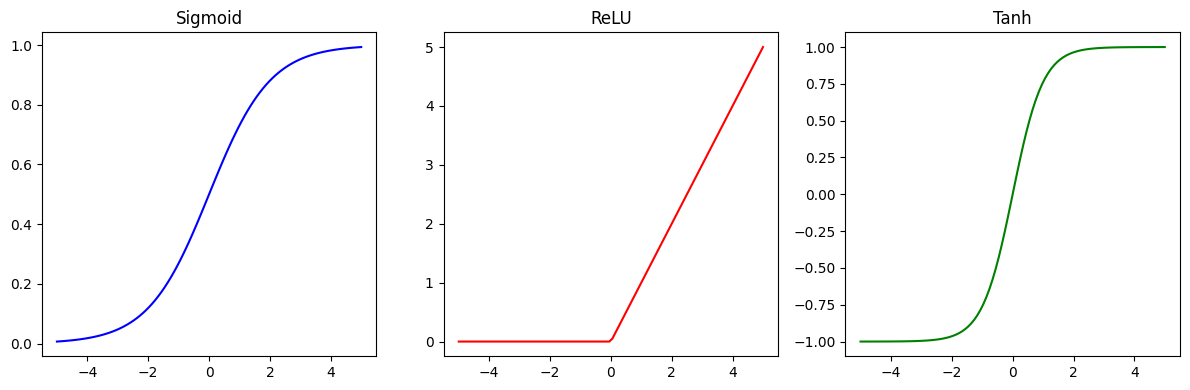

In [34]:
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(x, 1/(1+np.exp(-x)), 'b-')
plt.title('Sigmoid')

plt.subplot(132)
plt.plot(x, np.maximum(0, x), 'r-')
plt.title('ReLU')

plt.subplot(133)
plt.plot(x, np.tanh(x), 'g-')
plt.title('Tanh')

plt.tight_layout()
plt.show()

5. Suponha que você tenha um MLP composto de uma camada de entrada com 10 neurônios de passagem, seguido de uma camada oculta com 50 neurônios artificiais e, finalmente, uma camada de saída com 3 neurônios artificias. Todos os neurônios artificiais utilizam a função de ativação RelU.

A) Qual é a forma da matriz de entrada *X*?

B) O que dizer da forma do vetor de peso da camada oculta *Wh*, e da forma de seus vetores de polarização *b0*?

C) Qual é a forma do vetor de peso *W0* da camada de saída e seu vetor de polarização *b0*?

D) Qual é a forma da saída de rede da matriz *Y*?

E) Escreva a equação que calcule a saída de rede da matriz *Y* como uma função de *X*, *Wh*, *bh*, *W0* e *b0*.

F) Escreva a equação que calcule a saída de rede da matriz *Y* como função de *X*, *W*h, *b*h, *W*0 e *b*0.

- **A)** A matriz de entrada $\mathbf{X}$ tem forma $(n_{samples},\ 10)$.
- **B)** A matriz de pesos da camada oculta $\mathbf{W}_h$ tem forma $(10,\ 50)$ e o vetor de polarização $\mathbf{b}_h$ tem forma $(50,)$.
- **C)** A matriz de pesos da camada de saída $\mathbf{W}_0$ tem forma $(50,\ 3)$ e o vetor de polarização $\mathbf{b}_0$ tem forma $(3,)$.
- **D)** A matriz de saída $\mathbf{Y}$ tem forma $(n_{samples},\ 3)$.

**Equações:**

- **E)** $$\mathbf{H} = \mathrm{ReLU}(\mathbf{X} \cdot \mathbf{W}_h + \mathbf{b}_h)$$
- **F)** $$\mathbf{Y} = \mathrm{ReLU}(\mathbf{H} \cdot \mathbf{W}_0 + \mathbf{b}_0)$$
- **F alternativa)** $$\mathbf{Y} = \mathrm{ReLU}(\mathrm{ReLU}(\mathbf{X} \cdot \mathbf{W}_h + \mathbf{b}_h) \cdot \mathbf{W}_0 + \mathbf{b}_0)$$

6. De quantos neurônios você precisa na camada de saída se quiser classificar o e-mail como span ou não spam? Que função de ativação você deve utilizar na camada de saída? Se, em vez disso, você quiser abordar o MNIST, de quantos neurônios você precisa utilizando qual função de ativação na camada de saída?

- **Classificação de e-mail (spam ou não spam):**
    - **Número de neurônios na camada de saída:** 1 neurônio.
    - **Função de ativação:** Sigmoide (`sigmoid`), pois queremos uma saída entre 0 e 1 para representar a probabilidade de ser spam.

- **Classificação MNIST (10 dígitos):**
    - **Número de neurônios na camada de saída:** 10 neurônios (um para cada classe de dígito de 0 a 9).
    - **Função de ativação:** Softmax (`softmax`), pois queremos probabilidades para cada classe, garantindo que a soma das probabilidades seja 1.

7. O que é retropropagação e como isso funciona? Qual é a diferença entre retropropagação e autodiff de modo reverso?

A retropropagação (backpropagation) é o algoritmo de treinamento específico para redes neurais artificiais que calcula o gradiente da função de custo em relação aos pesos da rede, permitindo sua atualização através de métodos como o gradiente descendente. Já a diferenciação automática no modo reverso (reverse-mode autodiff) é uma técnica matemática geral para cálculo eficiente de derivadas em grafos computacionais arbitrários usando a regra da cadeia.

A diferença fundamental é que a retropropagação é uma aplicação específica do autodiff reverso projetada especificamente para redes neurais, incorporando conhecimento sobre a arquitetura de camadas, funções de ativação e o processo de treinamento. Em contraste, o autodiff reverso é um método genérico que pode ser aplicado a qualquer função representada como grafo computacional, independentemente de ser uma rede neural ou não.

Em resumo: a retropropagação usa o autodiff reverso como ferramenta matemática, mas adiciona componentes específicos de redes neurais, como a estrutura de camadas e o mecanismo de atualização de pesos, enquanto o autodiff reverso é a técnica computacional subjacente para cálculo de derivadas.

8. Você consegue listar todos os hiperparâmetros que podem ser ajustados em um MLP? Se o MLO se sobreajusta aos dados de treinamento, como ajustar esses hiperparâmetros para tentar resolver o problema?

Um MLP possui diversos hiperparâmetros ajustáveis, que podem ser categorizados em arquiteturais (número de camadas e neurônios, funções de ativação, inicialização de pesos), de treinamento (taxa de aprendizado, tamanho do lote, número de épocas, algoritmo de otimização) e de regularização (dropout, regularização L1/L2, early stopping).

Quando ocorre overfitting, onde o modelo performa bem nos dados de treinamento mas mal na validação, deve-se ajustar esses hiperparâmetros para reduzir a complexidade do modelo e aumentar a generalização. As principais estratégias incluem: aumentar a regularização (aumentar dropout e regularização L2), reduzir a capacidade do modelo (diminuir camadas e neurônios), aumentar o conjunto de treinamento com data augmentation, ajustar o processo de treinamento (reduzir épocas, ajustar learning rate) e aplicar técnicas avançadas como batch normalization.

A abordagem ideal é começar com uma arquitetura simples e gradualmente aumentar a complexidade, monitorando sempre a diferença de performance entre treino e validação para encontrar o equilíbrio ideal entre capacidade do modelo e generalização.

9. Treine um MLP profundo no conjunto de dados MNIST e veja se consegue obter mais de 98% de precisão. Assim como no último exercício do capítulo 9, tente adicionar todos os extras(ou seja, salve os pontos de verificação, restaure o último ponto de verificação em caso de interrupção, adicione resumos, plote as curvas de aprendizado com a utilização do TensorBoard e assim por diante).

In [ ]:
# 1. Carregar e preparar dados
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar e redimensionar
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

# 2. Criar modelo MLP profundo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Configurar callback simples (apenas checkpoint)
checkpoint_path = "mnist_best_model.keras"

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(
        checkpoint_path, 
        save_best_only=True,
        monitor='val_accuracy'
    )
]

# 4. Treinar o modelo
print("Treinando MLP...")
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=30,
    validation_split=0.1,
    callbacks=callbacks_list,
    verbose=1
)

# 5. Avaliar resultado final
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisão final no teste: {test_acc:.4f}")

if test_acc > 0.98:
    print("✅ Meta de 98% alcançada!")
else:
    print("❌ Meta não alcançada")

# 6. Mostrar histórico de treino
print("\nHistórico de treino:")
print(f"Melhor val_accuracy: {max(history.history['val_accuracy']):.4f}")

Treinando MLP...
Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9037 - loss: 0.3120 - val_accuracy: 0.9655 - val_loss: 0.1092
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9037 - loss: 0.3120 - val_accuracy: 0.9655 - val_loss: 0.1092
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9594 - loss: 0.1353 - val_accuracy: 0.9757 - val_loss: 0.0782
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9594 - loss: 0.1353 - val_accuracy: 0.9757 - val_loss: 0.0782
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9683 - loss: 0.1004 - val_accuracy: 0.9770 - val_loss: 0.0763
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9683 - loss: 0.1004 - val_accuracy: 0.9770 - val_loss: 0.0763
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9751 - loss: 0.0807 - val_accuracy: 0.9800 - val_loss: 0.0665
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9751 - loss: 0.0807 -

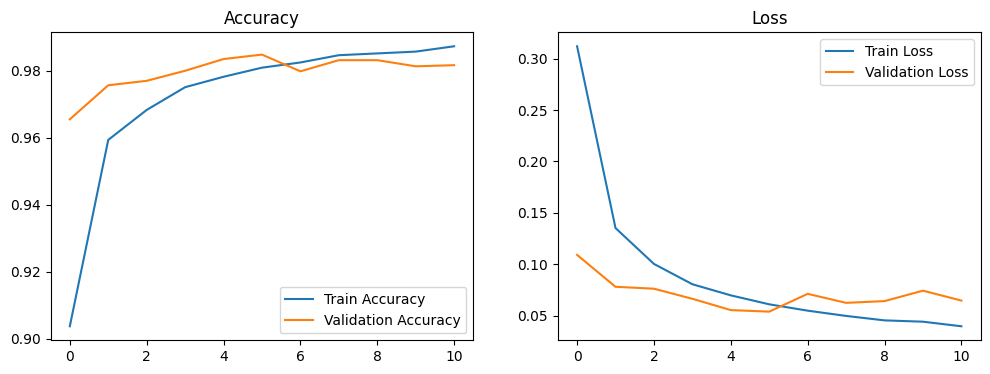

In [43]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()